# Classification Analysis of Patient Parameters on Stroke Predictions

In [20]:
library(tidyverse)
library(dplyr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

### Introduction

According to the World Health Organization (WHO), stroke is the second leading cause of death globally responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to have had a stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Given a patient data collection of parameters and measurements, can we predict whether or not a patient is likely to have had a stroke previously?
At large, these factors are categorized as reported modifiable risk factors, unlike sex, age and ethnicity which are classified as unmodifiable, and are ultimately hereditary. Modifiable risk factors are usually environmental influences that might raise the risk for stroke in certain people.

Hypertension is the most important modifiable risk factor for stroke, with a strong and continuous relationship between blood pressure and stroke risk (Hägg-Holmberg et al., 2019). Even among those who are not necessarily hypertensive, the higher the blood pressure, the higher the risk of stroke. Blood pressure (regardless of hypertension), rises with increasing age, thereby increasing the lifetime risk of developing this condition. Hence, hypertension (modifiable) is heavily correlated with age (unmodifiable). 

Body weight and obesity are risk factors for stroke. Obesity is related to stroke risk factors such as hypertension and diabetes. Recent data, found that 76% of the effect of BMI on stroke risk was mediated by blood pressure, cholesterol, and glucose levels (Boehme et al., 2017). Blood pressure solely accounted for 65% of the risk because of weight.

Stroke risk was nearly doubled in patients with impaired glucose tolerance (range from 140.4-198 mg/dL) compared with those with normal glucose levels (80 mg/dL- 126mg/dL), and nearly tripled in diabetic patients (glucose≥ 198 mg/dL) (Boehme et al., 2017). Patients with low glucose levels (<80mg/dL) had a 50% increased stroke risk compared with those with normal glucose levels. 

Smoking remains a major risk factor for stroke, nearly doubling the risk and contributing to 15% of all stroke deaths per year (Boehme et al., 2017). Smoking cessation rapidly reduces the risk of stroke, with added risk nearly disappearing 2 to 4 years after smoking cessation.


### Preliminary exploratory data analysis

In [21]:
stroke_data <- read_csv("data/healthcare-dataset-stroke-data.csv")

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)



Data Attribute and Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [22]:
head(stroke_data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [23]:
glimpse(stroke_data)

Rows: 5,110
Columns: 12
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 1043…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54,…
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, …
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, …
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "N…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", …
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", …
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [24]:
# If working on gender, ever_married, work_type, Residence_type, smoking_status, and stroke as categorical statistical variables
# need to convert them to a factor
stroke_data <- stroke_data %>%
    mutate(gender = as_factor(gender)) %>%
    mutate(ever_married = as_factor(ever_married)) %>%
    mutate(work_type = as_factor(work_type)) %>%
    mutate(Residence_type = as_factor(Residence_type)) %>%
    mutate(smoking_status = as_factor(smoking_status)) %>%
    mutate(bmi = as.double(bmi)) %>%
    mutate(stroke = as_factor(stroke))
glimpse(stroke_data)

Warning message:
“Problem with `mutate()` input `bmi`.
ℹ NAs introduced by coercion
ℹ Input `bmi` is `as.double(bmi)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Rows: 5,110
Columns: 12
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 1043…
$ gender            <fct> Male, Female, Male, Female, Female, Male, Male, Fem…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54,…
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, …
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, …
$ ever_married      <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, Ye…
$ work_type         <fct> Private, Self-employed, Private, Private, Self-empl…
$ Residence_type    <fct> Urban, Rural, Rural, Urban, Rural, Urban, Rural, Ur…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.…
$ bmi               <dbl> 36.6, NA, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, NA, 2…
$ smoking_status    <fct> formerly smoked, never smoked, never smoked, smokes…
$ stroke            <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [25]:
# Verify the levels of the stroke category
stroke_data %>%
    pull(stroke) %>%
    levels()

[1] "0" "1"

According to attribute values previously mentioned in point 12) stroke: 1 if the patient had a stroke or 0 if not

In [26]:
# Combination of Exploratory Data: Summarization
# Finding the number and percentage of observations of patients that had a stroke and patients that have not
stroke_obs <- nrow(stroke_data)
stroke_data_means <- stroke_data %>%
    group_by(stroke) %>%
    summarize(count = n(), percentage = n() / stroke_obs * 100,
              min_bmi = min(bmi, na.rm = TRUE),
              mean_bmi = mean(bmi, na.rm = TRUE),
              max_bmi = max(bmi, na.rm = TRUE),
              min_glucose_level = min(avg_glucose_level),
              mean_glucose_level = mean(avg_glucose_level),
              max_gluclose_level = max(avg_glucose_level),
              mean_age = mean(age))
stroke_data_means

`summarise()` ungrouping output (override with `.groups` argument)



stroke,count,percentage,min_bmi,mean_bmi,max_bmi,min_glucose_level,mean_glucose_level,max_gluclose_level,mean_age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4861,95.127202,10.3,28.82306,97.6,55.12,104.7955,267.76,41.97154
1,249,4.872798,16.9,30.47129,56.6,56.11,132.5447,271.74,67.72819


Training data contained 5110 data points and 201 incomplete rows. 

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 5110 data points and 201 incomplete rows. 

Operations:

Scaling for bmi, avg_glucose_level [trained]
Centering for bmi, avg_glucose_level [trained]

bmi,avg_glucose_level,stroke
<dbl>,<dbl>,<fct>
0.9812449,2.706110617,1
NA,2.121350940,1
0.4592224,-0.005027809,1
⋮,⋮,⋮
0.2173095,-0.5113926,0
-0.4193034,1.3281271,0
-0.3429099,-0.4608224,0


Warning message:
“Removed 201 rows containing missing values (geom_point).”


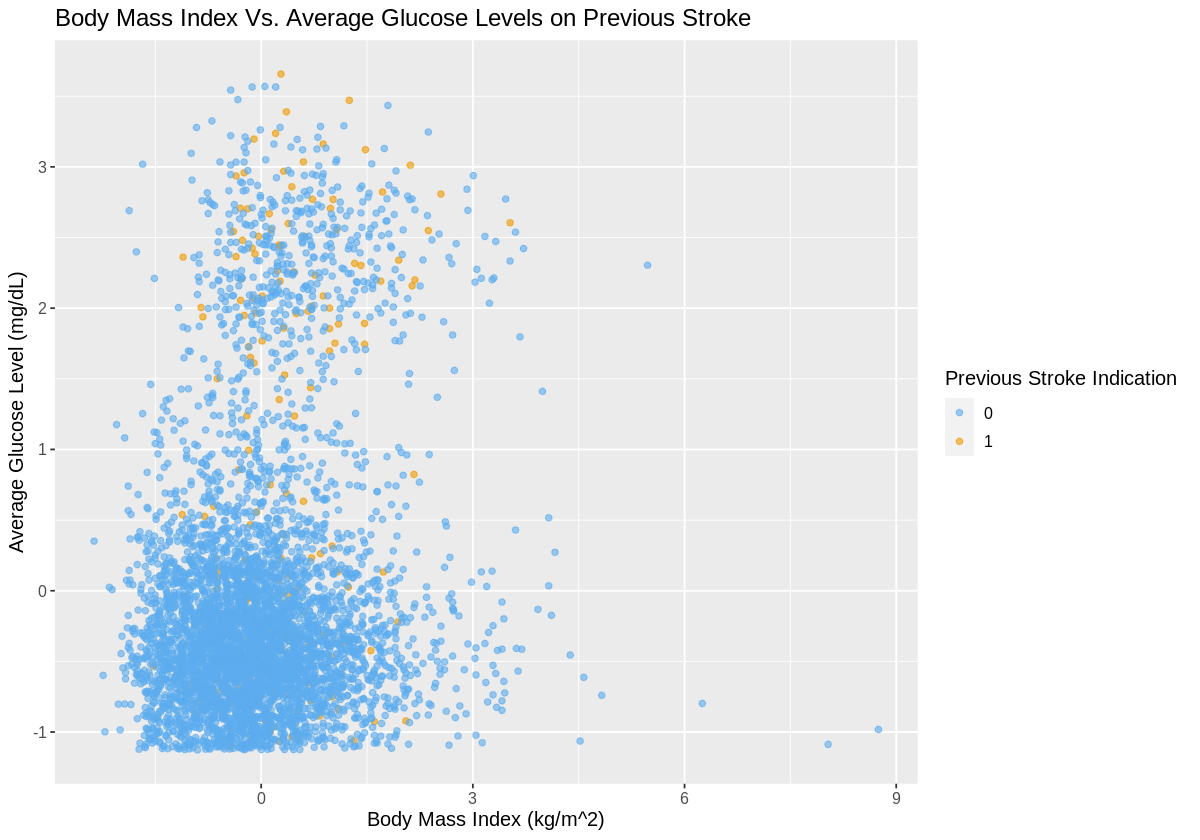

In [42]:
#Exploratory Data: Visualization
options(repr.plot.width = 8, repr.plot.width= 10)
# unscaled data for scaling
unscaled_stroke_data <- stroke_data %>%
    select(stroke, bmi, avg_glucose_level)
# data recipe
sd_recipe <- recipe(stroke ~ ., data = unscaled_stroke_data)
# scale and center
sd_recipe <- sd_recipe %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep()
sd_recipe
# scaled data
scaled_stroke_data <- bake(sd_recipe, unscaled_stroke_data)
scaled_stroke_data
# data plot
scaled_bmi_avg_gluc <- scaled_stroke_data %>%
    ggplot(aes(x = bmi, y = avg_glucose_level, color = stroke)) +
    geom_point(alpha = 0.6) +
    ggtitle("Body Mass Index Vs. Average Glucose Levels on Previous Stroke") +
    labs(x = "Body Mass Index (kg/m^2)", y = "Average Glucose Level (mg/dL)", color = "Previous Stroke Indication") +
    scale_color_manual(labels = c(0, 1),
                       values = c("steelblue2", "orange2")) +
    theme(text = element_text(size = 12))
scaled_bmi_avg_gluc


### Methods

We will be conducting data analysis via classification on stroke using parameters bmi, gluclose levels, paired with age, gender, hypertension, and heart disease history. Accuracy will be evaluated via data splits of training and testing sets and resultingly evaluating the accuracy of the classifer. This will be done with randomness via seeds to model reproducibility along with analysis via cross-validation, K nearest neighbor parameter selections, retraining, and model evaluation. This model will be graphed using a scatter plot to measure the accuracy of the predictions and classifier.


### Expected outcomes and significance:

Given what we know, we should expect to see the strongest relationship between stroke occurrence and hypertension. Concerning the rest of the factors, we should still expect to see a correlation between these and stroke risk. 

Finding trends within these medical factors would help us determine factors and parameters of interest in which to potentially indicate warning and whether or not they would require more invasive treatments. We could ask ourselves if medical therapy for smoking history, obesity and hypertension would dramatically decrease the risk for strokes. Furthermore, given the data prediction classifier, we can extend the model to predict previous stroke on new factors of interest.


### Work Cited

Boehme, Amelia K., et al. “Stroke Risk Factors, Genetics, and Prevention.” Circulation Research, 3 Feb. 2017, https://www.ahajournals.org/doi/full/10.1161/CIRCRESAHA.116.308398. 

Hägg-Holmberg, Stefanie, et al. “The Role of Blood Pressure in Risk of Ischemic and Hemorrhagic Stroke in Type 1 Diabetes - Cardiovascular Diabetology.” BioMed Central, BioMed Central, 9 July 2019, https://cardiab.biomedcentral.com/articles/10.1186/s12933-019-0891-4. 

Dataset source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
Author credentials: fedesoriano